In [9]:
# Text Similarity Analysis 텍스트 유사도
# TF-IDF
# Cosine simailarity
# 영화 리뷰 간 유사도 계산

In [10]:
# TF_IDF (Term Frequency-Inverse Document Frequency)
# 어떤 특정 단어(문장의 구성요소)가 문서나 말뭉치에서 어떤 중요도를 가지는지를 나타내는 지표
# 단어를 갯수 그대로 카운트하지 않고, 많은 문서에 공통적으로 들어있는 단어의 경우
# 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법

# 출연횟수 기준으로 문장간의 유사도 분성

# 단어 출연빈도 - 역 문서에서의 출현빈도
# 문서 d와 던어 t에 대해
# tf-idf(d) = tf(d,t) x idf(d,f)
# tf(d,t) : 단어의 빈도수
# idf(d,t) : inverse document frequency

# idf(d,y) = log nd / 1 + df(t)
# nd : 전체 문서의 수
# df(t) : 단어 t를 가진 문서의 수 

In [11]:
# Cosine similarity (코사인 유사도)
# 두 벡터 사이 각도의 코사인 값을 이용하여 측정하는 값으로, 두 벡터의 유사한 정도를 의미
# 계산도니 유사도는 -1에서 1까지의 값을 가지며,
# -1은 서로 완전히 반대되는 경우, 0은 서로 독립적인 경우, 1은 서로 완전히 같은 같은 경우
# 텍스트 매칭에 적용될 경우, A, B의 벡터로는 일반적으로 해당 문서에서의 단어 빈도가 사용된다.

# Similar(비슷) Unrelated(독립) Opposite(정반대)

In [12]:
# Text Analysis 실습
# TF-IDF & Cosine similarity을 이용하여 텍스트 간 유사도 계산하기

In [13]:
# sciket-learn
from sklearn import datasets, model_selection, linear_model, metrics

In [14]:
data = datasets.load_boston() # 보스톤 집값 데이터
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
import pandas as pd

pd.DataFrame(data['data']).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
pd.DataFrame(data['target']).head()

# Column == Attribute == Dimension == Featuer

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
x_data = data['data']
y_data = data['target']

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data,y_data,test_size=0.3)

In [20]:
model = linear_model.LinearRegression()

In [21]:
model.fit(x_train,y_train) # 모델을 학습시키겠다.

LinearRegression()

In [22]:
model.predict(x_text)[:10] # 예측된 집의 가격들

array([26.1281527 , 22.94031681, 28.51982158, 20.61936677, 16.71756178,
       23.01993099, 30.4284363 , 30.10304647, 33.28604462, 22.02571441])

In [25]:
metrics.mean_squared_error(model.predict(x_test),y_test)

21.62978309962348

In [39]:
# 유사도 분석에 필요한 패키지 불러오기
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
# 컴퓨터와 노트북의 유사도 분석
file = open('computer.txt','r',encoding='utf-8')
lines = file.readlines()
doc1 = ' '.join(lines)
# doc1 = '' 데이터를 담기위한 String 변수 생성

file = open('laptop.txt','r',encoding='utf-8')
lines = file.readlines()
doc2 = ' '.join(lines)

In [31]:
doc1 # Computer.txt

'A computer is a digital electronic machine that can be programmed to carry out sequences of arithmetic or logical operations (computation) automatically. Modern computers can perform generic sets of operations known as programs. These programs enable computers to perform a wide range of tasks. A computer system is a "complete" computer that includes the hardware, operating system (main software), and peripheral equipment needed and used for "full" operation. This term may also refer to a group of computers that are linked and function together, such as a computer network or computer cluster.\n A broad range of industrial and consumer products use computers as control systems. Simple special-purpose devices like microwave ovens and remote controls are included, as are factory devices like industrial robots and computer-aided design, as well as general-purpose devices like personal computers and mobile devices like smartphones. Computers power the Internet, which links billions of other

In [32]:
doc2 # laptop.txt

"alphanumeric keyboard. Laptops typically have a clam shell form factor with the screen mounted on the inside of the upper lid and the keyboard on the inside of the lower lid, although 2-in-1 PCs with a detachable keyboard are often marketed as laptops or as having a laptop mode. Laptops are folded shut for transportation, and thus are suitable for mobile use.[1] They are so named because they can be practically placed on a person's lap when being used. Today, laptops are used in a variety of settings, such as at work, in education, for playing games, web browsing, for personal multimedia, and for general home computer use.\n As of 2021, in American English, the terms laptop computer and notebook computer are used interchangeably;[2] in other dialects of English, one or the other may be preferred. Although the terms notebook computers or notebooks originally referred to a specific size of laptop (originally smaller and lighter than mainstream laptops of the time),[3] the terms have com

In [34]:
corpus = [doc1,doc2] #doc1, doc2를 합쳐 corpus list를 생성
#corpus[0]

In [47]:
vectorizer = TfidfVectorizer() # TFidfVectorizer 객체 생성

In [48]:
vectorizer.fit(corpus)

TfidfVectorizer()

In [49]:
result = vectorizer.transform(corpus).todense()

In [50]:
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,...,369,370,371,372,373,374,375,376,377,378
0,0.029532,0.029532,0.029532,0.029532,0.000000,0.059064,0.029532,0.029532,0.000000,0.000000,...,0.021012,0.084050,0.000000,0.021012,0.000000,0.029532,0.000000,0.042025,0.000000,0.029532
1,0.000000,0.000000,0.000000,0.000000,0.030336,0.000000,0.000000,0.000000,0.030336,0.030336,...,0.021585,0.021585,0.030336,0.043169,0.030336,0.000000,0.030336,0.064754,0.030336,0.000000


In [53]:
vectorizer.get_feature_names()

['1940s',
 '1950s',
 '1970s',
 '2000s',
 '2021',
 '20th',
 '21st',
 'abacus',
 'ac',
 'accountants',
 'adapter',
 'aided',
 'all',
 'allow',
 'along',
 'alphanumeric',
 'also',
 'although',
 'american',
 'an',
 'analog',
 'ancient',
 'and',
 'any',
 'applications',
 'are',
 'arithmetic',
 'as',
 'at',
 'automate',
 'automatically',
 'based',
 'battery',
 'be',
 'became',
 'because',
 'been',
 'being',
 'between',
 'billions',
 'both',
 'broad',
 'browsing',
 'built',
 'by',
 'calculating',
 'calculations',
 'can',
 'capabilities',
 'capacity',
 'carries',
 'carry',
 'central',
 'centuries',
 'century',
 'change',
 'charging',
 'child',
 'chip',
 'chips',
 'circuit',
 'clam',
 'cluster',
 'combine',
 'come',
 'complete',
 'components',
 'computation',
 'computer',
 'computers',
 'considered',
 'consists',
 'construction',
 'consumer',
 'control',
 'controls',
 'conventionally',
 'cost',
 'counts',
 'cpu',
 'data',
 'depending',
 'design',
 'desktop',
 'detachable',
 'developed',
 'devic

In [56]:
# fit_transform()를 통해 corpus의 텍스트 데이터를 벡터화해 X에 저장하고 X를 dense한 matrix로 변환
# raw counts have been normalized against document length, terms that are found across many docs are weighted

x = vectorizer.fit_transform(corpus).todense()

# .todense()의 역할 : 기본적으로 fit_transform의 결과로 만들어지는 행렬은 희소행렬(Sparse matirx),
# 희소행렬 내에는 무수히 많은 '0'이 존재하는데 이러한 '0'이라는 값을 저장하는 것 역시 공간(메모리)를 차지하므로,
# '0'인 값들은 아ㅖ 제외하고 나머지 숫자들만 실제로 저장하는 방식으로 처리한다
# 이렇게 저장한 데이터로 부터 현재 우리가 얻어내야하는 것은 값이 모두 채워진(Dense matrix)이므로,
# 마지막에 .todense()함수를 실행시 Sparse matrix로 부터 Dense matrix를 만들어 돌려받는다.

In [65]:
print(type(x))
x.shape

<class 'numpy.matrix'>


(2, 379)

In [67]:
print("Simailarity between 'Computer' and 'laptop': ",cosine_similarity(x[0],x[1])) #코사인 유사도

Simailarity between 'Computer' and 'laptop':  [[0.54198551]]


In [84]:
result = cosine_similarity(x[0],x[1])
result

array([[0.54198551]])

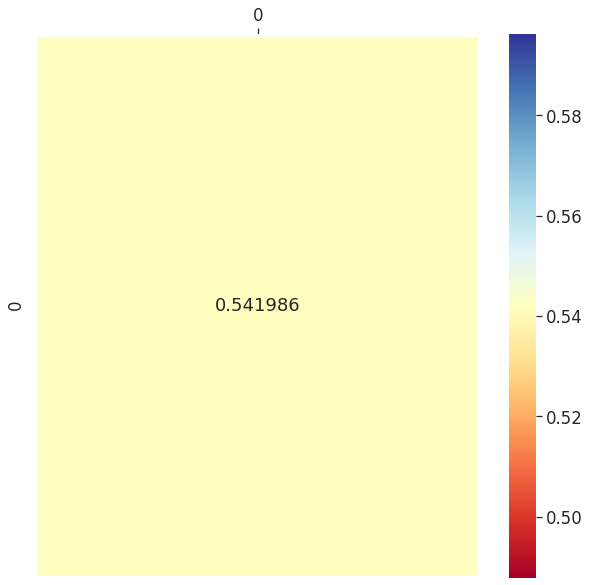

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.heatmap(result,annot=True,fmt='f',linewidth=5,cmap='RdYlBu')

sns.set(font_scale=1.5)

plt.tick_params(top=True, bottom=False,labeltop=True,labelbottom=False)
plt.show()